# **CSCS8010 ML Foundations Practical Lab-3**

### **Machine Learning Workflow (Step-1)- Understanding the Business Problem - Creating the Problem Statement**

**Diabetes is a wide spread chronic condition all over the world. Due to the change in lifestyle, food habits, and enivironmental conditions, people are more prone to the diabetes disease that earlier days. Considering all influencing factors, it is important to determine the significant factors that impact the disease progression in humans. Hence, we need to analyze the historic data of diabetic patients with all their physical diagnostic measures and disease prograssion levels in one year from the baseline. So that, we can measure the rate of disease progression by evaluating the impact of influencing factors. If we can determine the most significant factors that would aggravate the disease progression, we can take measures to control or mitigate the influences that are causing the problems from the patients' lifestyle.**

### **Machine Learning Workflow (Step-2)- Importing the Data - Obtaining Historical Data**

#### Importing the required packages

In [452]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from PIL import Image
import sklearn

#### Importing the diabetes dataset

In [453]:
from sklearn import datasets
diabetes_X, diabetes_y = datasets.load_diabetes(return_X_y=True)

In [454]:
diabetes_X

array([[ 0.03807591,  0.05068012,  0.06169621, ..., -0.00259226,
         0.01990749, -0.01764613],
       [-0.00188202, -0.04464164, -0.05147406, ..., -0.03949338,
        -0.06833155, -0.09220405],
       [ 0.08529891,  0.05068012,  0.04445121, ..., -0.00259226,
         0.00286131, -0.02593034],
       ...,
       [ 0.04170844,  0.05068012, -0.01590626, ..., -0.01107952,
        -0.04688253,  0.01549073],
       [-0.04547248, -0.04464164,  0.03906215, ...,  0.02655962,
         0.04452873, -0.02593034],
       [-0.04547248, -0.04464164, -0.0730303 , ..., -0.03949338,
        -0.00422151,  0.00306441]])

In [455]:
diabetes_X.shape

(442, 10)

There are 442 records (rows) and 10 features (columns) in the independent variable dataset.

In [456]:
diabetes_y

array([151.,  75., 141., 206., 135.,  97., 138.,  63., 110., 310., 101.,
        69., 179., 185., 118., 171., 166., 144.,  97., 168.,  68.,  49.,
        68., 245., 184., 202., 137.,  85., 131., 283., 129.,  59., 341.,
        87.,  65., 102., 265., 276., 252.,  90., 100.,  55.,  61.,  92.,
       259.,  53., 190., 142.,  75., 142., 155., 225.,  59., 104., 182.,
       128.,  52.,  37., 170., 170.,  61., 144.,  52., 128.,  71., 163.,
       150.,  97., 160., 178.,  48., 270., 202., 111.,  85.,  42., 170.,
       200., 252., 113., 143.,  51.,  52., 210.,  65., 141.,  55., 134.,
        42., 111.,  98., 164.,  48.,  96.,  90., 162., 150., 279.,  92.,
        83., 128., 102., 302., 198.,  95.,  53., 134., 144., 232.,  81.,
       104.,  59., 246., 297., 258., 229., 275., 281., 179., 200., 200.,
       173., 180.,  84., 121., 161.,  99., 109., 115., 268., 274., 158.,
       107.,  83., 103., 272.,  85., 280., 336., 281., 118., 317., 235.,
        60., 174., 259., 178., 128.,  96., 126., 28

In [457]:
diabetes_y.shape

(442,)

Dependent variable is a single response/target variable with 442 records.

### Data Description Screenshot

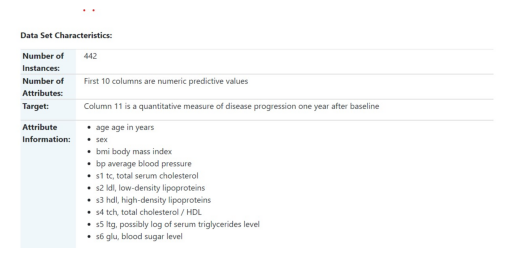

In [458]:
img = Image.open('C:/Users/dwara/OneDrive/Desktop/Ryan/CSCN8010-lab-submissions/students_submissions/8856840/Data_Desc.jpg')
fig = plt.imshow(img)
plt.axis('off')
fig.axes.get_xaxis().set_visible(False)
fig.axes.get_yaxis().set_visible(False)

### **Machine Learning Workflow (Step-3)- Explore the Data - Exploratory Data Analysis (EDA)**

#### Convering the diabetes_X array into dataframe

In [459]:
diabetes_X = pd.DataFrame(diabetes_X)
diabetes_X.columns = ["age", "sex", "bmi", "abp", "s1_tc", "s2_ldl", "s3_hdl","s4_tch","s5_ltg","s6_glu"]
# age = age in years
# sex = gender of the person
# bmi = body mass index
# abp = average blood pressure
# s1 = Total serum cholestrol
# s2 = low density lipoproteins
# s3 = high density lipoproteins
# s4 = Total cholestrol/HDL
# s5 = log of serum tryglyceride level
# s6 = blood sugar level
diabetes_X

,age,sex,bmi,abp,s1_tc,s2_ldl,s3_hdl,s4_tch,s5_ltg,s6_glu
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641
...,...,...,...,...,...,...,...,...,...,...
437,0.041708,0.050680,0.019662,0.059744,-0.005697,-0.002566,-0.028674,-0.002592,0.031193,0.007207
438,-0.005515,0.050680,-0.015906,-0.067642,0.049341,0.079165,-0.028674,0.034309,-0.018114,0.044485
439,0.041708,0.050680,-0.015906,0.017293,-0.037344,-0.013840,-0.024993,-0.011080,-0.046883,0.015491
440,-0.045472,-0.044642,0.039062,0.001215,0.016318,0.015283,-0.028674,0.026560,0.044529,-0.025930


#### Convering the diabetes_y array into dataframe

In [460]:
diabetes_y = pd.DataFrame(diabetes_y)
diabetes_y.columns = ["dis_prog"]


#### Merging the Dataframes into a single dataframe using inner join

In [461]:
diabetes = pd.concat([diabetes_X, diabetes_y], axis=1, join='inner')
diabetes

,age,sex,bmi,abp,s1_tc,s2_ldl,s3_hdl,s4_tch,s5_ltg,s6_glu,dis_prog
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646,151.0
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204,75.0
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930,141.0
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362,206.0
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641,135.0
...,...,...,...,...,...,...,...,...,...,...,...
437,0.041708,0.050680,0.019662,0.059744,-0.005697,-0.002566,-0.028674,-0.002592,0.031193,0.007207,178.0
438,-0.005515,0.050680,-0.015906,-0.067642,0.049341,0.079165,-0.028674,0.034309,-0.018114,0.044485,104.0
439,0.041708,0.050680,-0.015906,0.017293,-0.037344,-0.013840,-0.024993,-0.011080,-0.046883,0.015491,132.0
440,-0.045472,-0.044642,0.039062,0.001215,0.016318,0.015283,-0.028674,0.026560,0.044529,-0.025930,220.0


### Creating a Correlation Plot

<Axes: >

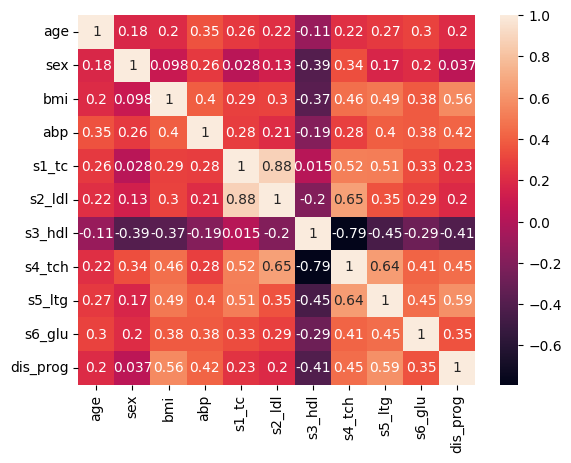

In [462]:
sns.heatmap(diabetes.corr(method="spearman"), annot=True)

The diabetes disease progression has higher positive correlation with s5_ltg (0.59) and bmi (0.56). That means as these independent variables are higher, the disease progression would get high.

The diabetes disease progression has high negative correlation with s3_hdl(-0.41). Hence, the response variable will be lower, if this parameter increases.

#### Illustrating the Box plot of Independent variables

<Axes: >

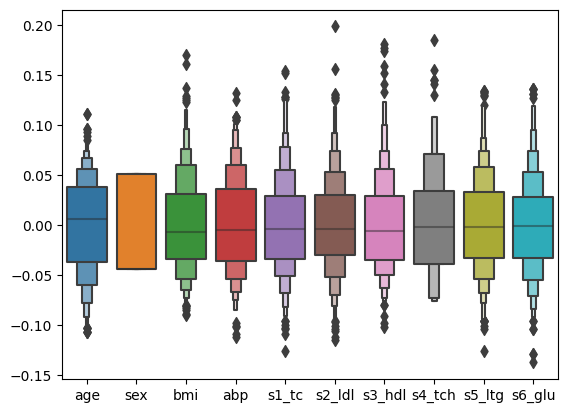

In [463]:
sns.boxenplot(diabetes.iloc[:,:-1])

The box plot representation shows that the variability of all independent variables is almost similar.
The varaible "sex" is a categorical varibale. Hence, we are not getting any box plot for that.

#### Creating a scatter plot between the independent ('bmi") variable and target variable (dis_prog)

<Axes: xlabel='bmi', ylabel='dis_prog'>

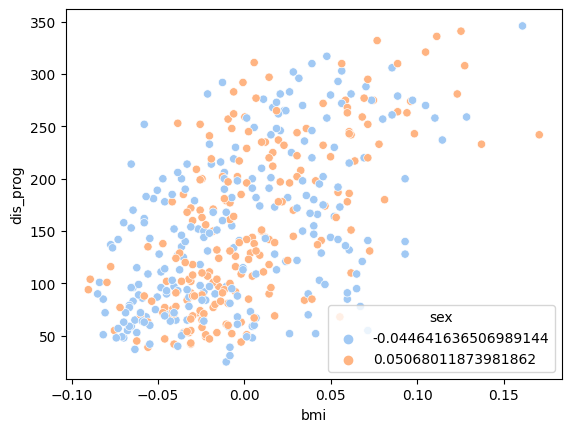

In [464]:
sns.scatterplot(data = diabetes, x = "bmi", y = "dis_prog", hue = "sex", palette= "pastel")

The positive correlation between bmi and dis_prog is evident from the scatter plot. However, the variance of the data points is very high. That means, the data points were scattered all over the graph.

### **Machine Learning Workflow (Step-6)- Model Development - Univariate Linear Regression Model Building**

### **Creating the Linear Regression Model between bmi and dis_prog**

#### Activating the packages

In [465]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics

#### Splitting the diabetes dataframe into features and target

In [466]:
X = np.array(diabetes["bmi"]).reshape(-1,1) # X is the feature array (Independent Varible)
y = np.array(diabetes["dis_prog"]) # y is the target array (Dependent Variable)

#### Splitting the data into train and test sets with training data of 80% and test data of 20%

In [467]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=123) # Data is splitted into 80:20 ratio

#### Plots of Training data and Test Data

Text(0, 0.5, 'dis_prog')

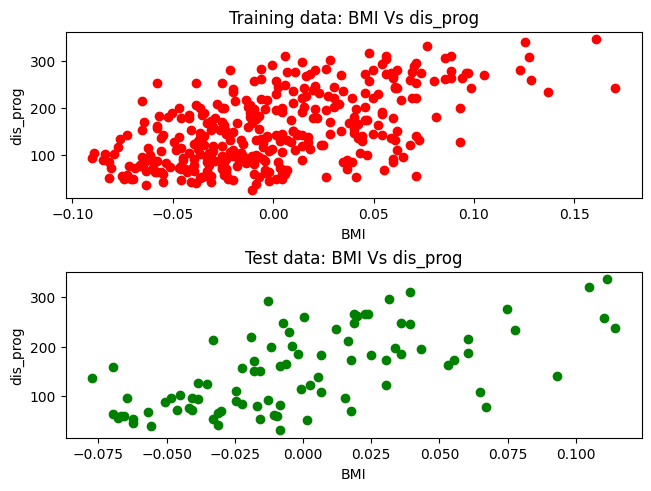

In [468]:
fig, axs = plt.subplots(2, 1, layout='constrained')
axs[0].scatter(x = X_train, y = y_train, c = "r")
axs[0].set_title('Training data: BMI Vs dis_prog')
axs[0].set_xlabel('BMI')
axs[0].set_ylabel('dis_prog')
axs[1].scatter(x = X_test, y = y_test, c = "g")
axs[1].set_title("Test data: BMI Vs dis_prog")
axs[1].set_xlabel('BMI')
axs[1].set_ylabel('dis_prog')

#### Creating the Linear Regression Model

In [469]:
model = LinearRegression()
model

LinearRegression()

#### Fitting (Training) the Model with training data

In [470]:
model.fit(X_train, y_train)

LinearRegression()

#### Finding the coefficients Intercepts of the trained model

In [471]:
m = model.coef_
b = model.intercept_
print("Regression coefficients of the model are: ", m)
print("Regression Intercept is: ", b)

Regression coefficients of the model are:  [914.80793327]
Regression Intercept is:  152.4041464339237


The slope is 914.807, which is positive. Hence, the bmi and dis_prog has a positive linear correlation between them.
The intercept value of 152.404 represents that the regression line touches the y_axis at 152.4 units. The model predicts the dis_prog variable using the following equation: **dis_prog (predicted) = 914.80793327 * (bmi) + 152.4041464339**

### **Machine Learning Workflow (Step-7)- Presenting the solution - Model Results Interpretation**

#### Predict the target variable for test data "bmi"

In [472]:
y_pred = model.predict(X_test)
y_pred

array([150.6708545 , 135.88098896, 188.13851386, 185.18054075,
       129.96504275, 148.69887243, 254.19991326, 125.03508757,
       168.41869314, 106.30125789, 124.04909653, 146.72689036,
       169.40468418, 183.20855868, 145.74089932, 135.88098896,
       111.23121307, 158.55878279, 170.39067522, 223.63419115,
       137.85297104, 220.67621804, 147.71288139, 101.37130271,
       124.04909653, 180.25058557, 144.75490829, 144.75490829,
       131.93702482, 144.75490829, 136.86698   , 207.85833457,
       188.13851386, 200.95639732, 173.34864832, 131.93702482,
       122.07711446,  81.651482  , 185.18054075, 110.24522203,
       169.40468418,  91.51139235, 115.17517721, 142.78292621,
       115.17517721, 181.23657661,  90.52540132, 114.18918618,
       137.85297104, 202.9283794 ,  88.55341925, 166.44671107,
       237.43806565, 207.85833457, 117.14715928, 154.61481864,
       257.15788636, 157.57279175, 140.81094414, 213.77428079,
       175.32063039, 117.14715928, 248.28396704, 211.80

These are the predicted values of dis_prog for a given bmi according to the model.

#### Compare the prediction data against the test data

In [473]:
y_pred_df = pd.DataFrame(y_pred)
y_test_df = pd.DataFrame(y_test)
y_comp = pd.concat([y_test_df,y_pred_df], axis = 1, join="inner")
y_comp.columns = ["y_test_df", "y_pred_df"]
y_comp

,y_test_df,y_pred_df
0,185.0,150.670855
1,150.0,135.880989
2,246.0,188.138514
3,184.0,185.180541
4,110.0,129.965043
...,...,...
84,258.0,253.213922
85,235.0,163.488738
86,173.0,168.418693
87,59.0,92.497383


From the above comparison, we can see the significant difference between the actual data values and the model predicted values.

#### Plotting the Prediction line Vs actual data

Text(0, 0.5, 'dis_prog')

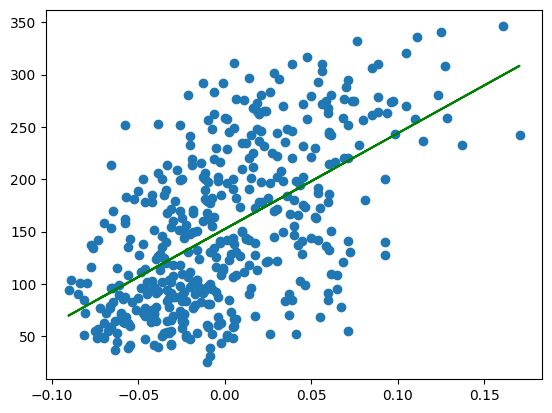

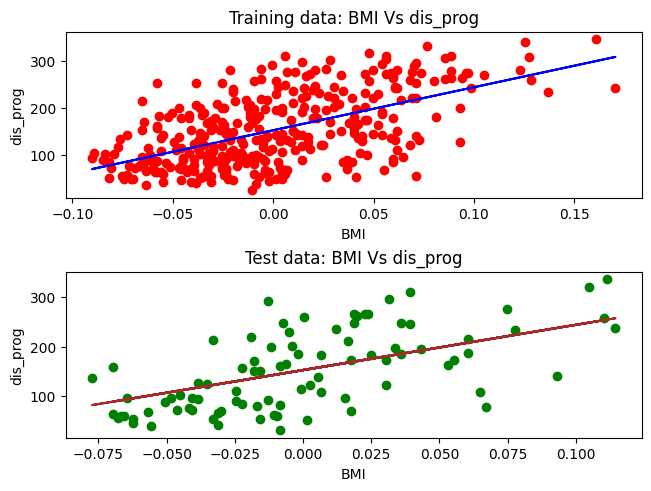

In [474]:
plt.scatter(X,y)
plt.plot(X, m * X + b, c = "g")
fig, axs = plt.subplots(2, 1, layout='constrained')
axs[0].scatter(x = X_train, y = y_train, c = "r")
axs[0].plot(X_train, m * X_train + b, c = "b")
axs[0].set_title('Training data: BMI Vs dis_prog')
axs[0].set_xlabel('BMI')
axs[0].set_ylabel('dis_prog')
axs[1].scatter(x = X_test, y = y_test, c = "g")
axs[1].plot(X_test, m * X_test + b, c = "brown")
axs[1].set_title("Test data: BMI Vs dis_prog")
axs[1].set_xlabel('BMI')
axs[1].set_ylabel('dis_prog')

The red and green color data points represents the ground truth i.e., the actual data (Train and Test data respectively). The blue and brown lines are the prediction (regression) lines for training and test data sets, which are the collections of all prediction points for various values of bmi. As we can see that, due to high variance of the actual data, there is a lot of difference between the actual data point and prediction data.

#### Finding the Loss Functions

In [475]:
# The mean squared error
mse = metrics.mean_squared_error(y_test, y_pred)
print('Mean squared error: %.2f' % mse)

# The mean absolute error
print("Mean absolue error: %.2f" %metrics.mean_absolute_error(y_test, y_pred))

# Root Mean Square Error
print("RMSE of the model is: %.2f" %np.sqrt(mse))

# Accuracy of the model
print("R-Squared of the model: %.2f" %model.score(X,y))

Mean squared error: 3878.10
Mean absolue error: 51.46
RMSE of the model is: 62.27
R-Squared of the model: 0.34


The mean square error and mean absolute are higher for this univariate regression model.
As we have considered only a single parameter out of all 10 independent variables, there is a significant deviation in the prediction results from the actual values. This is evident from the higher RMSE value of the model. As the model is performing poorly due to the high variance of data points w.r.t bmi, we are getting a R-squared value of 0.34, which indicates the poor performance of our univariate linear regression model.Hence, our model is not a good fit for predicting the disease progression using bmi alone.